In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data(4).csv', sep=';')
data.columns = data.iloc[1]
data = data.drop([0, 1])

In [13]:
data.columns = ['Code', 'Libellé', 'Cat', 'Evolution SAU', 'Urbain', 'Zone humide', 'Forets', 'Agri', 'Superficie', 'Conso_ENAF', 'Population']

In [9]:
data

,Code,Libellé,Cat,Evolution SAU,Urbain,Zone humide,Forets,Agri,Superficie,Conso ENAF,Population
2,01001,L'Abergement-Clémenciat,2,6.2,3.7,0,24.1,72.3,15.9,6.8,832
3,01002,L'Abergement-de-Varey,2,21.1,0,0,64.8,35.2,9.2,1.5,267
4,01004,Ambérieu-en-Bugey,10,-7.8,35.6,0,49,15.4,24.6,61,14854
5,01005,Ambérieux-en-Dombes,2,9.6,6.7,0,3.4,78.3,15.9,12.2,1897
6,01006,Ambléon,1,289.4,5.5,0,73.8,20.7,5.9,0.7,113
...,...,...,...,...,...,...,...,...,...,...,...
34932,97613,M'Tsangamouji,1,N/A - résultat non disponible,5.3,0,72.1,22.6,N/A - résultat non disponible,N/A - résultat non disponible,N/A - résultat non disponible
34933,97614,Ouangani,2,N/A - résultat non disponible,6.9,0,47,46.1,N/A - résultat non disponible,N/A - résultat non disponible,N/A - résultat non disponible
34934,97615,Pamandzi,2,N/A - résultat non disponible,58.7,0,0.7,40.5,N/A - résultat non disponible,N/A - résultat non disponible,N/A - résultat non disponible
34935,97616,Sada,1,N/A - résultat non disponible,14.8,0,63,22,N/A - résultat non disponible,N/A - résultat non disponible,N/A - résultat non disponible


count    34935.000000
mean         7.386632
std          5.442704
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        135.000000
Name: Cat, dtype: float64


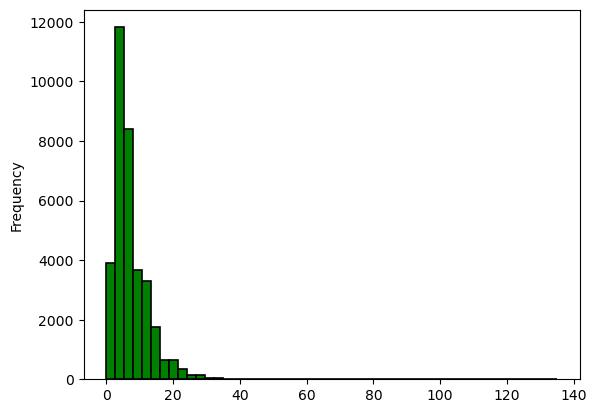

In [14]:
data.iloc[:,2].astype(float).plot(kind='hist', bins=50, color='green', edgecolor='black', linewidth=1.2)
print(data.iloc[:,2].astype(float).describe())

In [15]:
data_plot = data[data.iloc[:,3] != 'N/A - résultat non disponible']
data_plot = data_plot[data_plot.iloc[:,3] != 'N/A - division par 0']

data_plot = data_plot[data_plot.Conso_ENAF != 'N/A - division par 0']
data_plot = data_plot[data_plot.Conso_ENAF != 'N/A - résultat non disponible']
data_plot = data_plot[data_plot.iloc[:,4] != 'N/A - division par 0']
data_plot = data_plot[data_plot.iloc[:,4] != 'N/A - résultat non disponible']
data_plot = data_plot[data_plot.Superficie != 'N/A - division par 0']
data_plot = data_plot[data_plot.Superficie != 'N/A - résultat non disponible']
data_plot = data_plot[data_plot.Population != 'N/A - division par 0']
data_plot = data_plot[data_plot.Population != 'N/A - résultat non disponible']

In [ ]:
#plot the mean of the columns 3 for each decile of the column 2
data_plot.iloc[:,2] = data_plot.iloc[:,2].astype(float)
data_plot.iloc[:,3] = data_plot.iloc[:,3].astype(float)
data_plot.iloc[:,4] = data_plot.iloc[:,4].astype(float)
data_plot['Superficie'] = data_plot['Superficie'].astype(float)
data_plot['Population'] = data_plot['Population'].astype(float)
data_plot['Conso_ENAF'] = data_plot['Conso_ENAF'].astype(float)
data_plot['Cat'] = data_plot['Cat']/data_plot['Superficie']
data_plot['Conso_ENAF'] = data_plot['Conso_ENAF']/data_plot['Superficie']
deciles = pd.qcut(data_plot.iloc[:,2], 10, labels=False)
data_plot['decile'] = deciles

#keep only columns 2, 3 and decile



TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [115]:
#group by decile and calculate the mean of column 3
data_plot = data_plot[['decile', data_plot.columns[2], data_plot.columns[3], data_plot.columns[-2], data_plot.columns[4]]]

data_plot = data_plot.groupby('decile').mean()

In [116]:
data_plot

,Cat,Evolution SAU,Conso ENAF,Urbain
decile,,,,
0,0.096207,34.323914,0.333281,2.400268
1,0.195163,12.235091,0.412516,3.330788
2,0.276383,11.166736,0.463545,4.156465
3,0.363645,19.323086,0.543557,4.746293
4,0.465529,6.84409,0.586819,5.406647
5,0.589522,18.689925,0.653928,6.134649
6,0.745314,24.161923,0.765534,7.488363
7,0.971164,14.675385,0.858696,8.356864
8,1.330528,23.558354,0.987103,9.898998


Text(0.5, 0, 'Decile of Natural Hazard Declared')

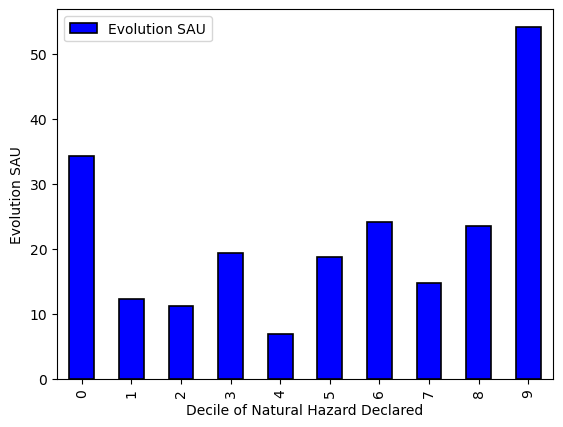

In [99]:
data_plot.plot(y=data_plot.columns[1], kind='bar', color='blue', edgecolor='black', linewidth=1.2)
plt.ylabel('Evolution SAU')
plt.xlabel('Decile of Natural Hazard Declared')

Text(0.5, 0, 'Decile of Natural Hazard Declared')

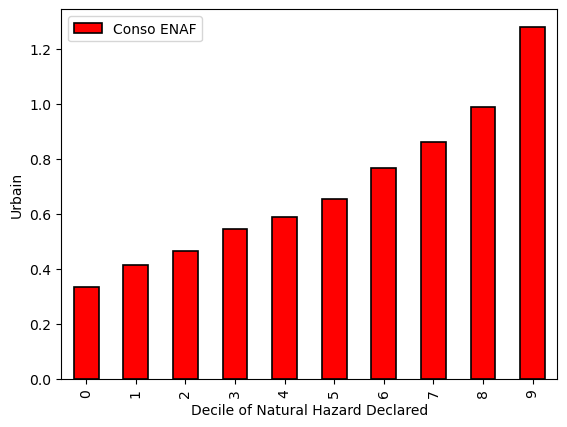

In [100]:
#same for column 3
data_plot.plot(y=data_plot.columns[2], kind='bar', color='red', edgecolor='black', linewidth=1.2)
plt.ylabel('Urbain')
plt.xlabel('Decile of Natural Hazard Declared')


In [ ]:
#same for column 3
data_plot.plot(y=data_plot.columns[2], kind='bar', color='red', edgecolor='black', linewidth=1.2)
plt.ylabel('Urbain')
plt.xlabel('Decile of Natural Hazard Declared')


In [127]:
df_conso = pd.read_csv('conso2009-2023-resultats-com.csv', sep=';')

C:\Users\colin\AppData\Local\Temp\ipykernel_21824\2894030197.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso = pd.read_csv('conso2009-2023-resultats-com.csv', sep=';')


In [128]:
cols = ['artcom0923','art09hab23', 'idcom']

#merge data on Code and idcom
data['Code'] = data['Code'].astype(str)
df_conso['artcom0923'] = df_conso['artcom0923'].astype(str)
df_conso = df_conso[cols]



In [129]:
#the number with only 4 digits need to be completed with 0 at the beginning
df_conso['idcom'] = df_conso['idcom'].apply(lambda x: '0'+str(x) if len(str(x)) == 4 else str(x) )


In [159]:
df = data_plot.merge(df_conso, left_on='Code', right_on='idcom')

In [160]:
#check the coevolution of Conso_ENAF/Superficie and art09hab23
df['artcom0923'] = df['artcom0923'].astype(float)
df['art09hab23'] = df['art09hab23'].astype(float)
df['art09hab23'] = df['art09hab23']/df['Superficie']/1e4

<Axes: xlabel='Conso ENAF', ylabel='artcom0923'>

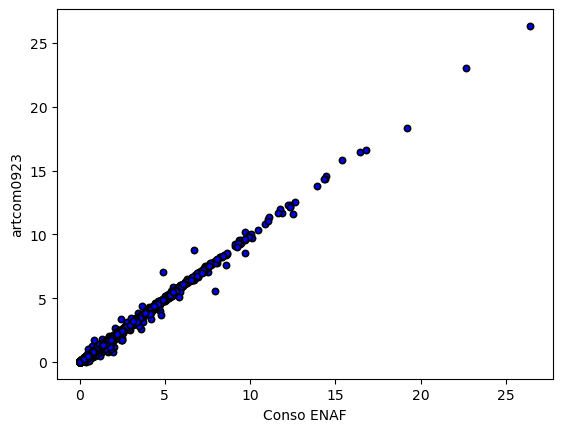

In [150]:
df.plot(x='Conso ENAF', y='artcom0923', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)

In [157]:
df

,Code,Libellé,Cat,Evolution SAU,Urbain,Zone humide,Forets,Agri,Superficie,Conso ENAF,decile,artcom0923,art09hab23,idcom
0,01001,L'Abergement-Clémenciat,0.125786,6.2,3.7,0,24.1,72.3,15.9,0.427673,0,0.43,4157.421384,01001
1,01002,L'Abergement-de-Varey,0.217391,21.1,0.0,0,64.8,35.2,9.2,0.163043,1,0.16,992.282609,01002
2,01004,Ambérieu-en-Bugey,0.406504,-7.8,35.6,0,49,15.4,24.6,2.479675,3,2.49,12463.008130,01004
3,01005,Ambérieux-en-Dombes,0.125786,9.6,6.7,0,3.4,78.3,15.9,0.767296,0,0.76,4583.773585,01005
4,01006,Ambléon,0.169492,289.4,5.5,0,73.8,20.7,5.9,0.118644,1,0.11,882.203390,01006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33300,97420,Sainte-Suzanne,0.415225,-1.3,11.8,0,31.1,57,57.8,2.193772,4,2.19,15119.757785,97420
33301,97421,Salazie,0.231214,-0.7,5.4,0,70.9,23.2,103.8,0.524085,1,0.52,4887.716763,97421
33302,97422,Le Tampon,0.133011,-8.4,16.2,0,35.4,48.1,165.4,1.848851,0,1.69,15623.688029,97422
33303,97423,Les Trois-Bassins,0.305164,-28.3,9.0,0,61.3,29.7,42.6,1.356808,2,1.36,12127.511737,97423


Text(0.5, 1.0, 'The slope of the regression is 0.3')

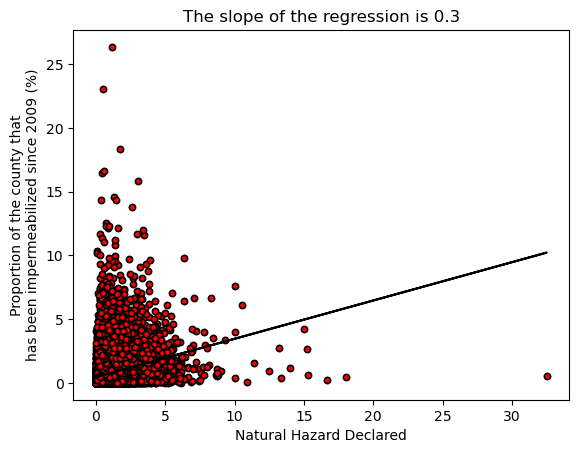

In [164]:
df.plot(x='Cat', y='artcom0923', kind='scatter', color='red', edgecolor='black', linewidth=1.2)
#add the linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Cat']], df['artcom0923'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat'], a*df['Cat']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized since 2009 (%)')
plt.xlabel('Natural Hazard Declared')
#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))



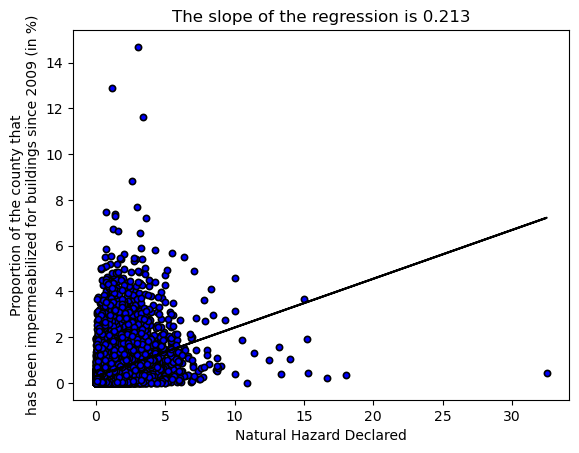

In [163]:
df.plot(x='Cat', y='art09hab23', kind='scatter', color='blue', edgecolor='black', linewidth=1.2)
#add the linear regression
model = LinearRegression()
model.fit(df[['Cat']], df['art09hab23'])
a = model.coef_
b = model.intercept_
plt.plot(df['Cat'], a*df['Cat']+b, color='black')
plt.ylabel('Proportion of the county that\nhas been impermeabilized for buildings since 2009 (in %)')
plt.xlabel('Natural Hazard Declared')

#print in the title the slope
plt.title('The slope of the regression is '+str(round(a[0], 3)))
plt.show()


In [166]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.
